In [1]:
# manage data and fit
import pandas as pd
import numpy as np

# first part with least squares
from scipy.optimize import curve_fit

# second part about ODR
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid", font_scale=2)

from math import sqrt,pi,exp

In [2]:
df = pd.read_csv(
    "2018-11 JMT Li-rich NMC Pristine-csp-22112018.TXT", 
    sep="\t",
    skiprows=3,
)

In [3]:
df

,KE_LiM3p_s MRSof/23,BE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
0,1390.79,95.9,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
1,1390.89,95.8,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
2,1390.99,95.7,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
3,1391.09,95.6,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
4,1391.19,95.5,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1443.39,43.3,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
527,1443.49,43.2,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
528,1443.59,43.1,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525
529,1443.69,43.0,63.25,63.25,63.2520,63.25,63.25,63.25,63.25,63.25,63.25,63.25,63.250,63.25,63.25,63.25,63.2520


In [4]:
ddf = df.set_index("BE_LiM3p_s MRSof/23")
ddf

,KE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
BE_LiM3p_s MRSof/23,,,,,,,,,,,,,,,,
95.9,1390.79,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
95.8,1390.89,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
95.7,1390.99,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
95.6,1391.09,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
95.5,1391.19,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.3,1443.39,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
43.2,1443.49,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
43.1,1443.59,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525


In [5]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

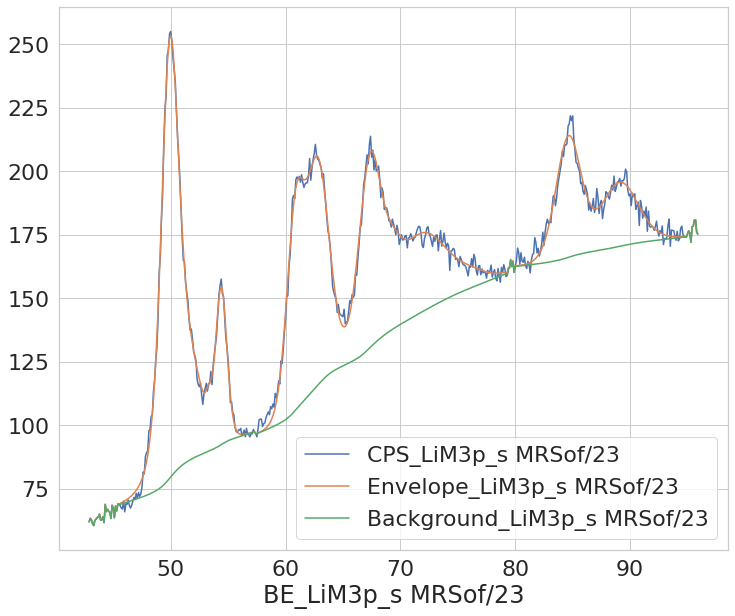

In [6]:
(ddf.iloc[:,[1,-1,-2]]).plot(figsize=(12, 10), legend=True
        )

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

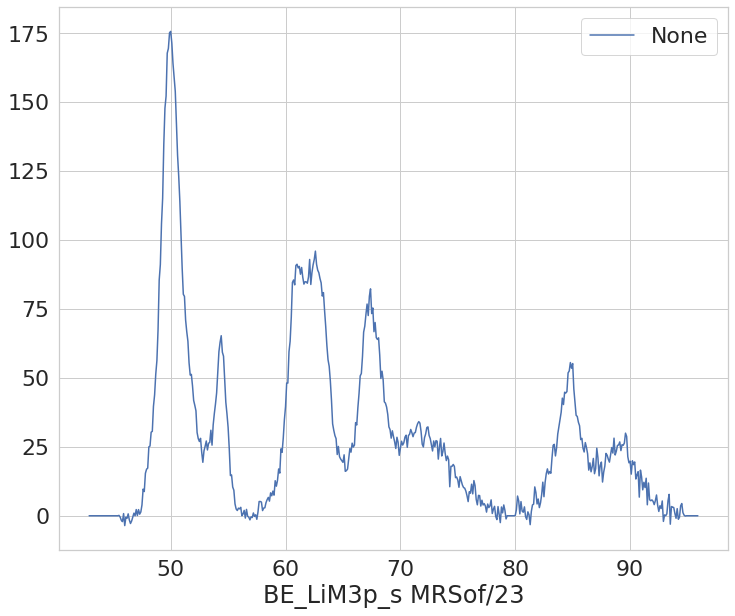

In [7]:
(ddf.iloc[:,1]- ddf.iloc[:,-3]).plot(figsize=(12, 10), legend=True
        )

In [8]:
data= pd.DataFrame()
CPS=(ddf["CPS_LiM3p_s MRSof/23"]- ddf["Background_LiM3p_s MRSof/23"])
data["cps"]=CPS
data["be"]=data.index

In [9]:
data1=data.loc[(data.index<53) & (data.index>=47)]

In [10]:
data2=data.loc[(data.index<57) & (data.index>=53)]

In [11]:
data3=data.loc[(data.index<65) & (data.index>=57)]

In [12]:
data4=data.loc[(data.index<69.5) & (data.index>=65)]

In [13]:
data5=data.loc[(data.index<80) & (data.index>=69.5)]

In [14]:
data6=data.loc[(data.index<87) & (data.index>=80)]

In [15]:
data7=data.loc[(data.index<93) & (data.index>=87)]

In [16]:
def gaussienne(x,a,mu,sigma):
    return a*((1/(sqrt(2*pi)*sigma))*np.exp(-1/2*((x-mu)/sigma)**2))

In [17]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data1["be"],   # x data
    ydata=data1["cps"],   # y data
    p0=[400,50, 1],      # initial value of the parameters
)

[406.38660018  50.09103687   0.99677209]


<ipython-input-18-27289a462519>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

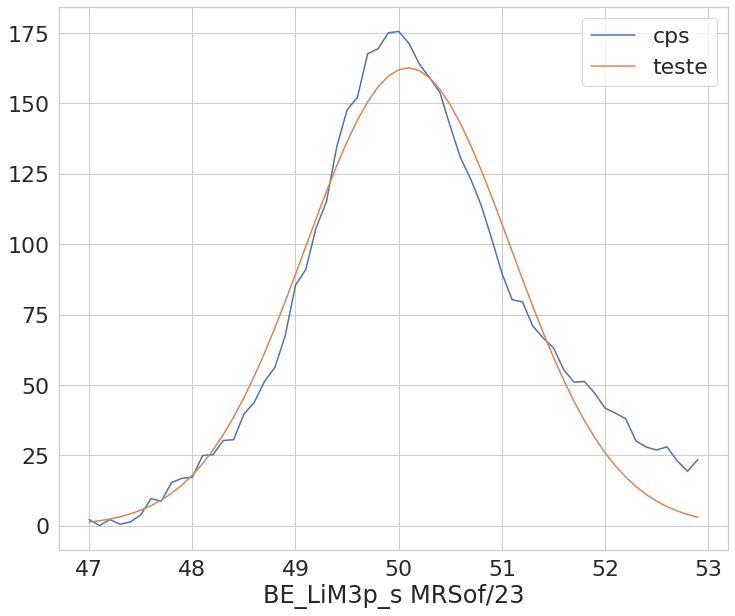

In [18]:
print(popt)
a=gaussienne(data1["be"],popt[0],popt[1],popt[2])
data1["teste"]=a
(data1.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

In [19]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data2["be"],   # x data
    ydata=data2["cps"],   # y data
    p0=[50,56, 1],      # initial value of the parameters
)

[96.75219613 54.2689149   0.67714019]


<ipython-input-20-478b3e690bbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

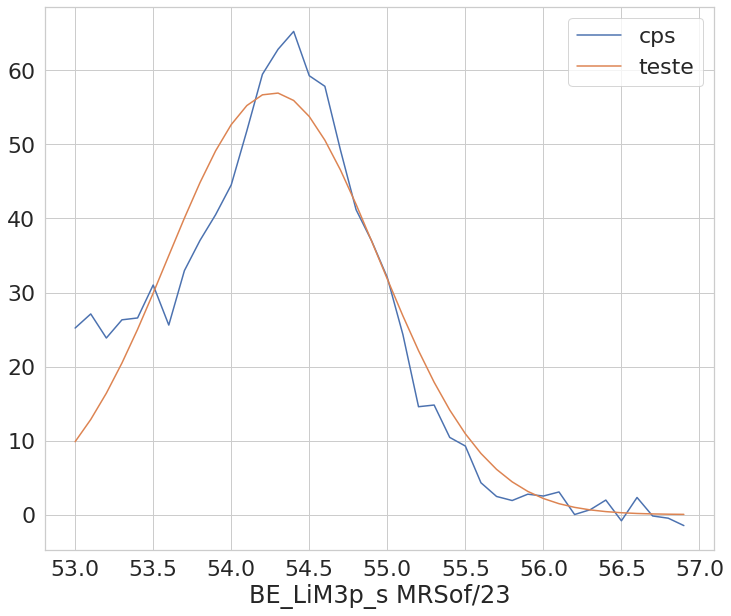

In [20]:
print(popt)
a=gaussienne(data2["be"],popt[0],popt[1],popt[2])
data2["teste"]=a
(data2.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

In [21]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data3["be"],   # x data
    ydata=data3["cps"],   # y data
    p0=[400,62, 1],      # initial value of the parameters
)

[383.18270709  62.02167138   1.5589287 ]


<ipython-input-22-83dc44416d55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

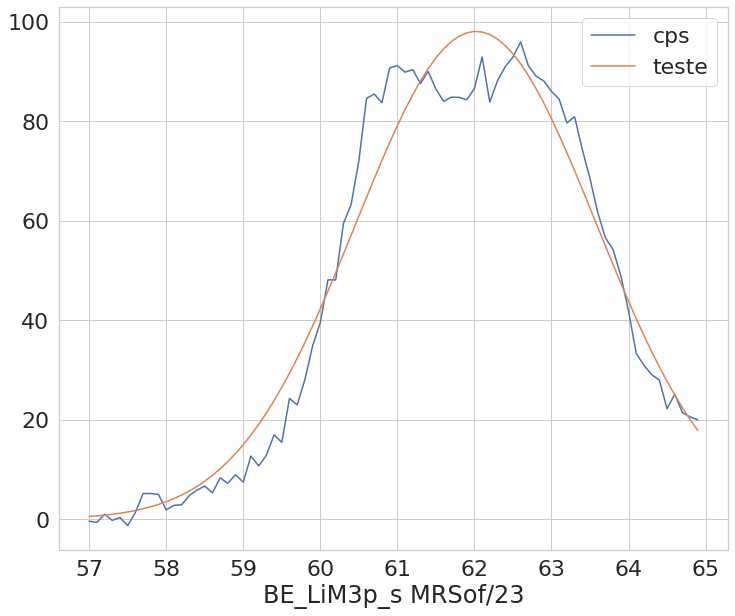

In [22]:
print(popt)
a=gaussienne(data3["be"],popt[0],popt[1],popt[2])
data3["teste"]=a
(data3.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

In [23]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data4["be"],   # x data
    ydata=data4["cps"],   # y data
    p0=[400,67, 1],      # initial value of the parameters
)

[245.95924133  67.63174093   1.32920435]


<ipython-input-24-406550fc6e2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

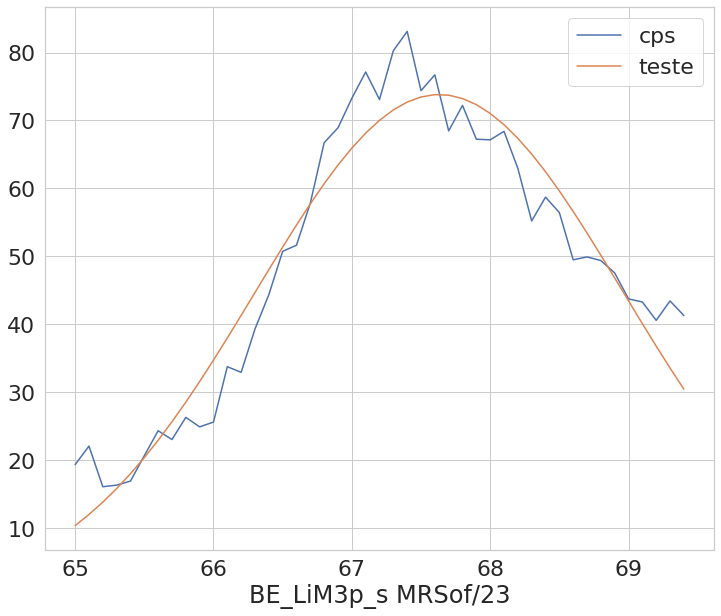

In [24]:
print(popt)
a=gaussienne(data4["be"],popt[0],popt[1],popt[2])
data4["teste"]=a
(data4.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

In [25]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data5["be"],   # x data
    ydata=data5["cps"],   # y data
    p0=[400,72, 1],      # initial value of the parameters
)

[306.17336631  70.22504853   3.54786696]


<ipython-input-26-1a67f6bd8559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

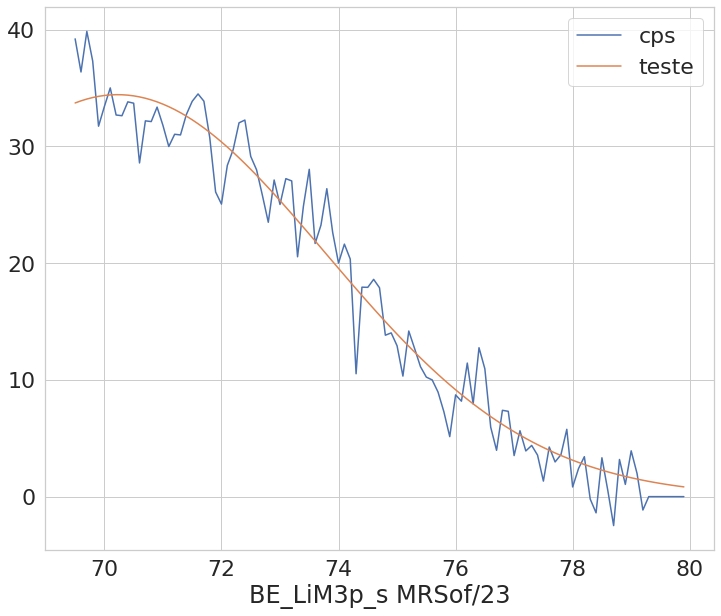

In [26]:
print(popt)
a=gaussienne(data5["be"],popt[0],popt[1],popt[2])
data5["teste"]=a
(data5.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

In [27]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data6["be"],   # x data
    ydata=data6["cps"],   # y data
    p0=[400,84, 1],      # initial value of the parameters
)

[144.3200168   84.7376215    1.23513855]


<ipython-input-28-21adc774d0b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

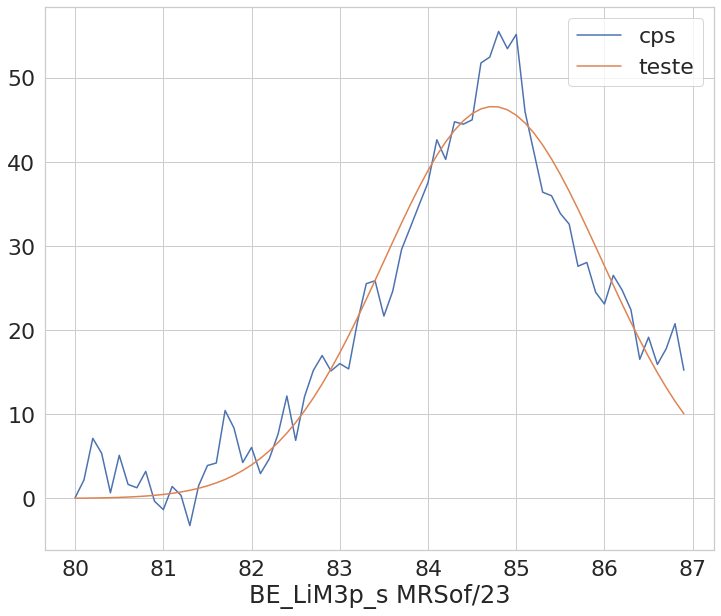

In [28]:
print(popt)
a=gaussienne(data6["be"],popt[0],popt[1],popt[2])
data6["teste"]=a
(data6.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

In [29]:
popt, pcov = curve_fit(
    f=gaussienne,       # model function
    xdata=data7["be"],   # x data
    ydata=data7["cps"],   # y data
    p0=[400,90, 1],      # initial value of the parameters
)

[113.11466532  88.88854851   1.80722943]


<ipython-input-30-3ddb03c4cd37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data7["teste"]=a


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

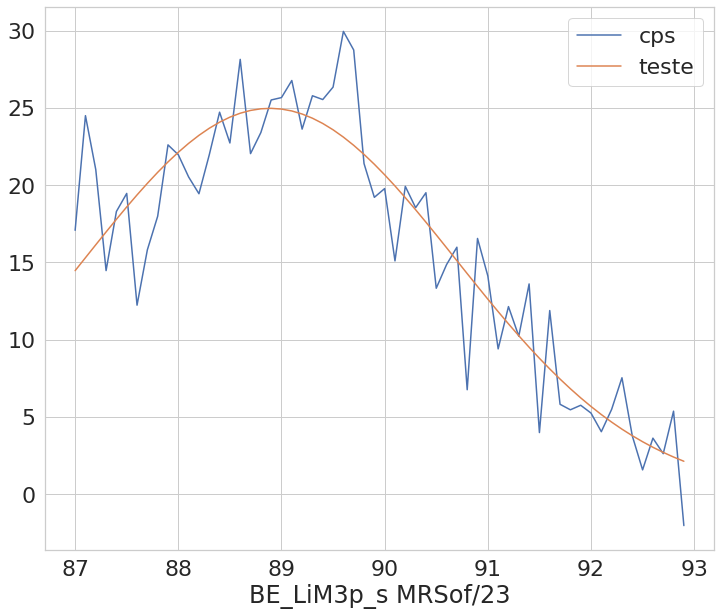

In [30]:
print(popt)
a=gaussienne(data7["be"],popt[0],popt[1],popt[2])
data7["teste"]=a
(data7.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

In [31]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [32]:
data = pd.concat([data1, data2, data3, data4, data5, data6, data7], ignore_index=False, sort=False)

In [33]:
data = data.sort_index()

In [34]:
data

,cps,be,teste
BE_LiM3p_s MRSof/23,,,
47.0,2.2448,47.0,1.327575
47.1,0.0883,47.1,1.802961
47.2,2.2364,47.2,2.424056
47.3,0.5793,47.3,3.226471
47.4,1.3757,47.4,4.251495
47.5,3.9200,47.5,5.546059
47.6,9.6581,47.6,7.162362
47.7,8.7830,47.7,9.157077
47.8,15.4096,47.8,11.590078


<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

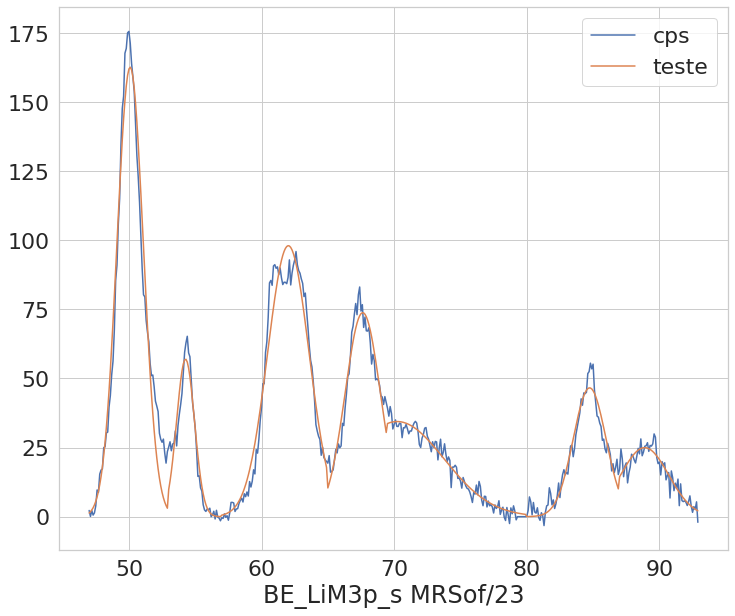

In [35]:
(data.iloc[:,[0,-1]]).plot(figsize=(12, 10), legend=True)

</br>

In [36]:
df = pd.read_csv(
    "Amiens Lirich-NMC 02-Li-ric-pristine-26062014 Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

FileNotFoundError: [Errno 2] No such file or directory: 'Amiens Lirich-NMC 02-Li-ric-pristine-26062014 Métaux3p-Li1s.TXT'

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "ANR Int 5V electrode reference LNM Metaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Barboux Lirich-NMC SD100-01072016 Métaux3p-Li1s.TXT", 
    sep="\t",
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Nath NMC1--TEST140-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Nath NMC-brut-080212-fi-nouvelle-detection-kratos Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Nath NMCTEST79-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Adrien AS11 electrode FIT Silouhette AMIENS2014.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df